In [1]:
!pip install pylhe

import pylhe
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

In [2]:
lhe_file = "/users/eleves-b/2022/baptiste.barthe-gold/Documents/Comput_HEP/MG5_aMC_v2_9_22/VBF-cHDD-1/Events/run_01/unweighted_events.lhe.gz"

events = pylhe.read_lhe_with_attributes(lhe_file)
nevents = pylhe.read_num_events(lhe_file)
print(f"Number of events: {nevents}")

Number of events: 10000


In [3]:
# event = next(events)
# event

In [4]:
def compute_mass(four_mom):
    return np.sqrt(
        four_mom[3] ** 2 - (four_mom[0] ** 2 + four_mom[1] ** 2 + four_mom[2] ** 2)
    )

In [5]:
arr = ak.Array(
    [
        {
            "px": -118.7,
            "py": -171.6,
            "pz": 1299.5,
            "e": 1316.1,
        },
        {
            "px": 260.6,
            "py": 203.8,
            "pz": -1069.9,
            "e": 1120,
        },
    ],
    with_name="Momentum4D",
)

In [6]:
print((arr[0] + arr[1]).mass)

2420.887151438497


In [7]:
def extract_4m(events):
    cross_section_weight, quarks_4m, leptons_4m = [], [], []

    for event in events:
        # select only final state particles
        part = [i for i in event.particles if i.status == 1.0]

        # select only quarks up to charm
        quarks = [i for i in part if abs(i.id) <= 4]

        # select only leptons
        leptons = [i for i in part if abs(i.id) in [11, 13, 15]]

        # sanity check, we expect quarks and leptons to be a list of two elements
        assert len(quarks) == 2, f"Length of selected quarks is not 2: {len(quarks)}"
        assert len(leptons) == 2, f"Length of selected leptons is not 2: {len(leptons)}"

        quarks_4m.append(
            [
                {
                    "px": quarks[0].px,
                    "py": quarks[0].py,
                    "pz": quarks[0].pz,
                    "e": quarks[0].e,
                },
                {
                    "px": quarks[1].px,
                    "py": quarks[1].py,
                    "pz": quarks[1].pz,
                    "e": quarks[1].e,
                },
            ]
        )

        leptons_4m.append(
            [
                {
                    "px": leptons[0].px,
                    "py": leptons[0].py,
                    "pz": leptons[0].pz,
                    "e": leptons[0].e,
                },
                {
                    "px": leptons[1].px,
                    "py": leptons[1].py,
                    "pz": leptons[1].pz,
                    "e": leptons[1].e,
                },
            ]
        )

        cross_section_weight.append(event.eventinfo.weight)

    quarks_4m = ak.Array(quarks_4m, with_name="Momentum4D")
    leptons_4m = ak.Array(leptons_4m, with_name="Momentum4D")

    return quarks_4m, leptons_4m, cross_section_weight

In [8]:
quarks_4m, leptons_4m, cross_section_weight = extract_4m(events)
jj_4m = quarks_4m[:, 0] + quarks_4m[:, 1]
ll_4m = leptons_4m[:, 0] + leptons_4m[:, 1]

Text(0, 0.5, 'N events')

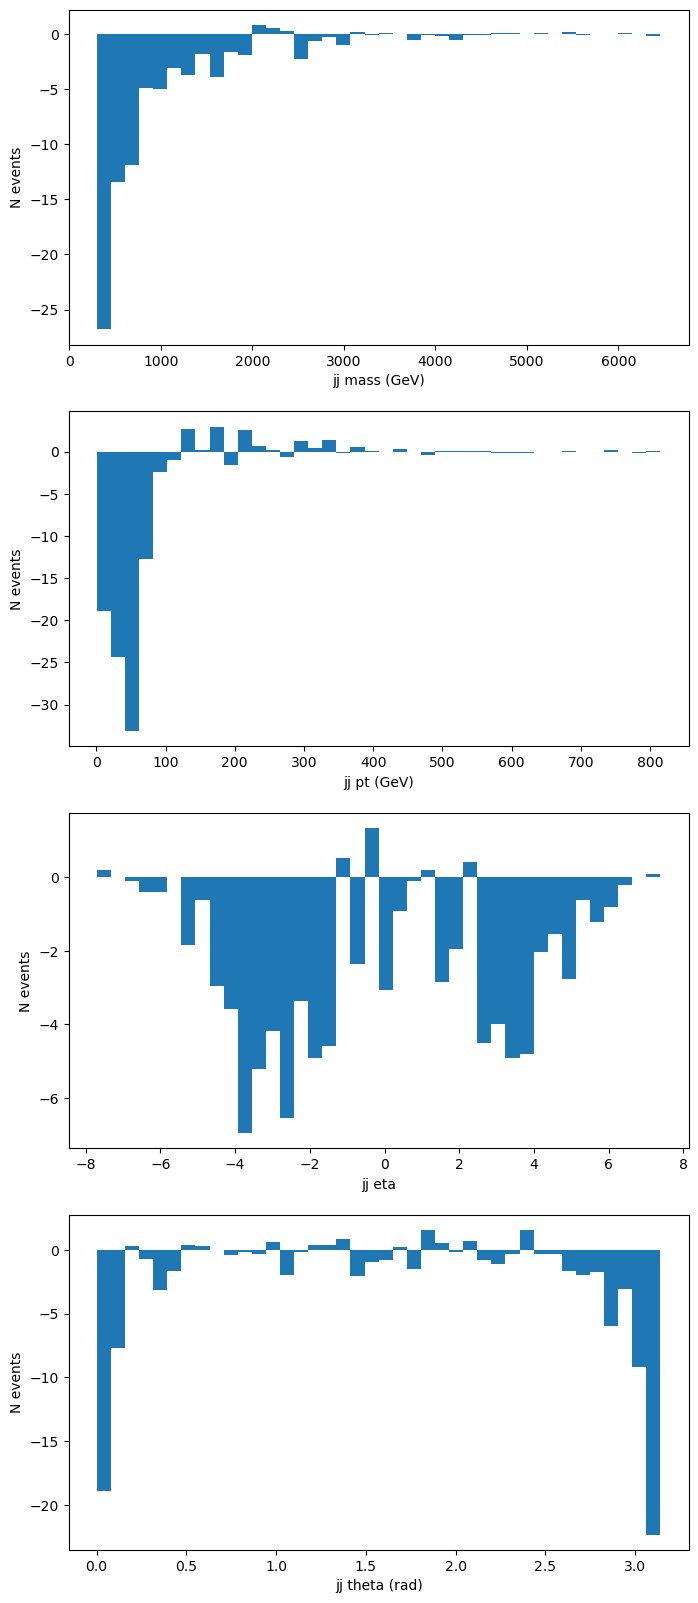

In [9]:
n_bins = 40

fig, ax = plt.subplots(4, 1, figsize=(8, 20))
ax[0].hist(jj_4m.mass, weights=cross_section_weight, bins=n_bins)
ax[0].set_xlabel("jj mass (GeV)")
ax[0].set_ylabel("N events")

ax[1].hist(jj_4m.pt, weights=cross_section_weight, bins=n_bins)
ax[1].set_xlabel("jj pt (GeV)")
ax[1].set_ylabel("N events")

ax[2].hist(jj_4m.eta, weights=cross_section_weight, bins=n_bins)
ax[2].set_xlabel("jj eta")
ax[2].set_ylabel("N events")

ax[3].hist(jj_4m.theta, weights=cross_section_weight, bins=n_bins)
ax[3].set_xlabel("jj theta (rad)")
ax[3].set_ylabel("N events")

Text(0, 0.5, 'N events')

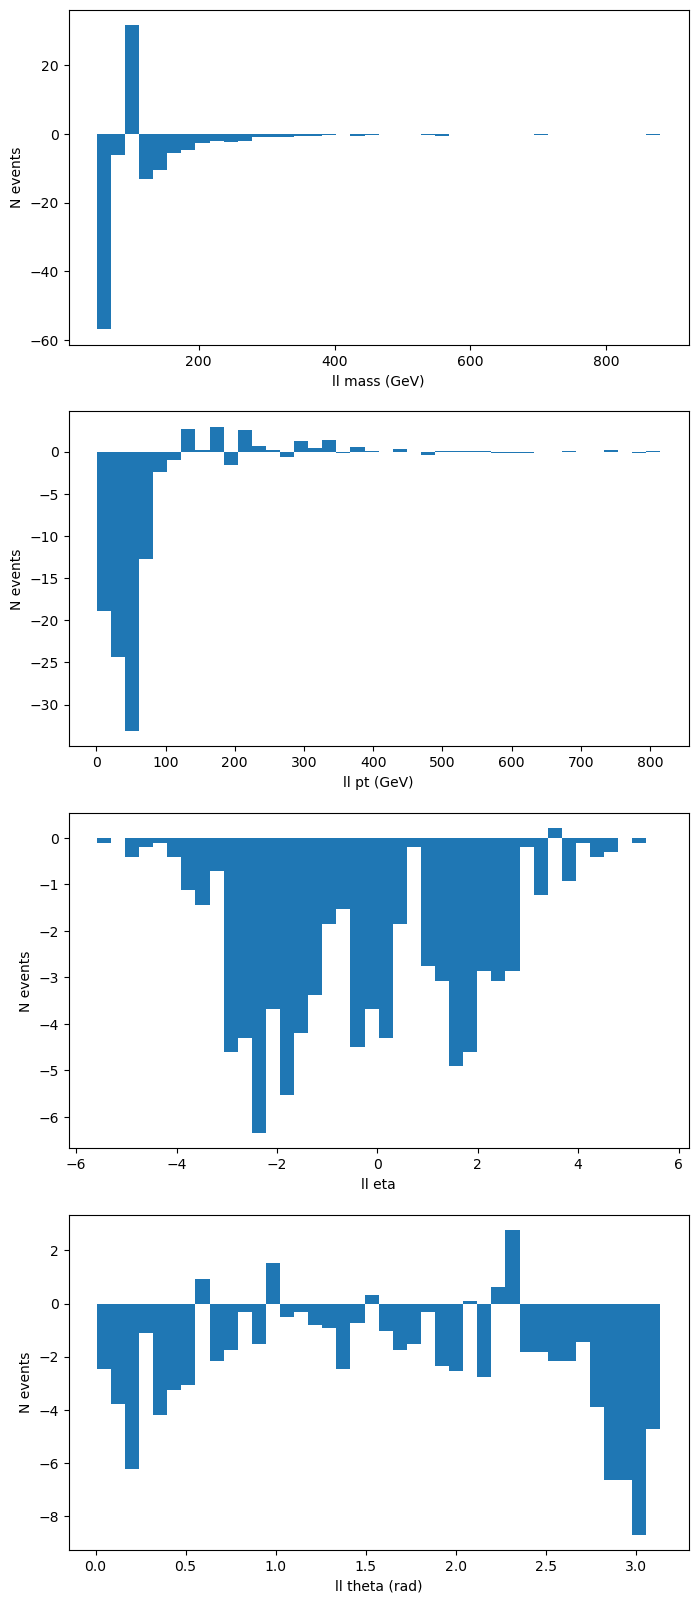

In [10]:
n_bins = 40

fig, ax = plt.subplots(4, 1, figsize=(8, 20))
ax[0].hist(ll_4m.mass, weights=cross_section_weight, bins=n_bins)
ax[0].set_xlabel("ll mass (GeV)")
ax[0].set_ylabel("N events")

ax[1].hist(ll_4m.pt, weights=cross_section_weight, bins=n_bins)
ax[1].set_xlabel("ll pt (GeV)")
ax[1].set_ylabel("N events")

ax[2].hist(ll_4m.eta, weights=cross_section_weight, bins=n_bins)
ax[2].set_xlabel("ll eta")
ax[2].set_ylabel("N events")

ax[3].hist(ll_4m.theta, weights=cross_section_weight, bins=n_bins)
ax[3].set_xlabel("ll theta (rad)")
ax[3].set_ylabel("N events")

Text(0, 0.5, 'N events')

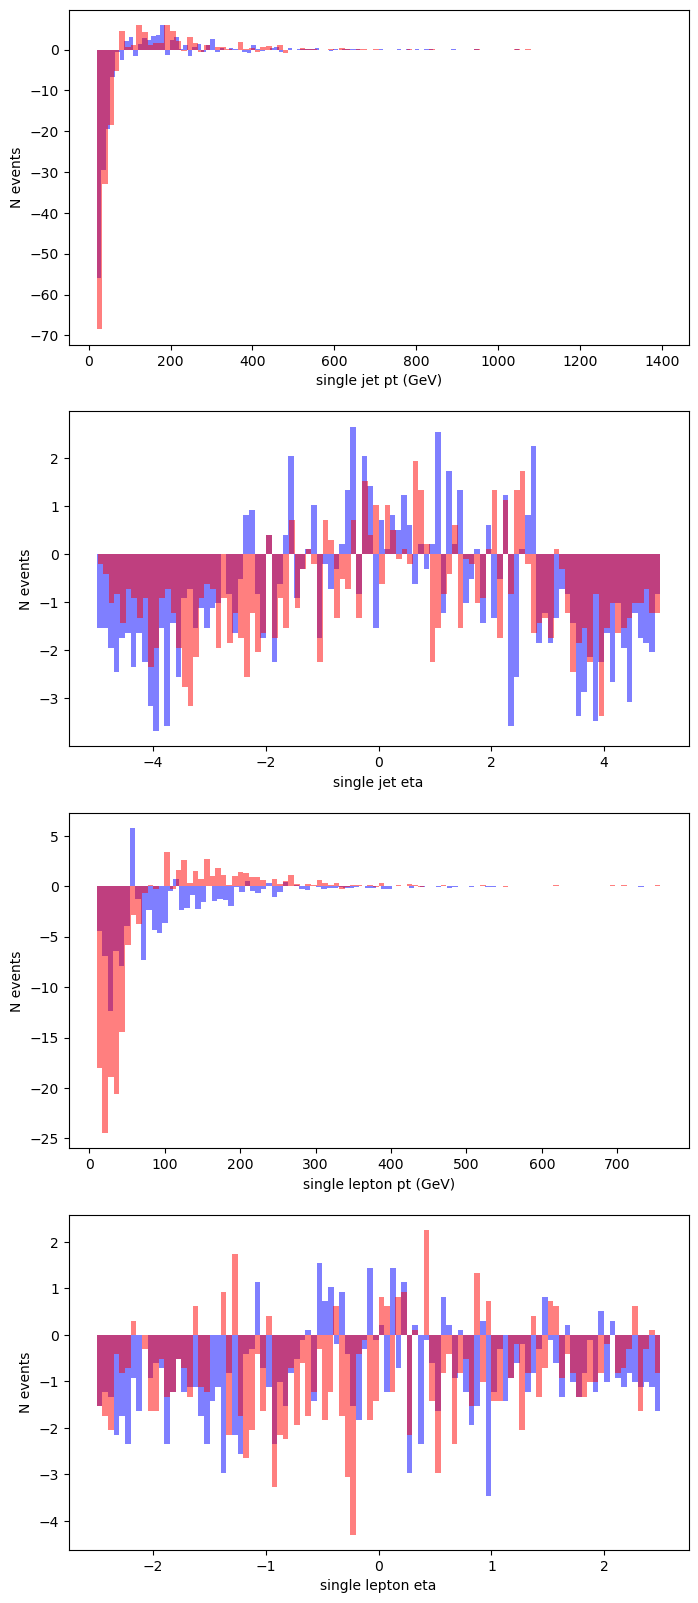

In [11]:
fig, ax = plt.subplots(4, 1, figsize=(8, 20))
ax[0].hist(
    quarks_4m[:, 0].pt,
    weights=cross_section_weight,
    bins=100,
    color="blue",
    alpha=0.5,
)
ax[0].hist(
    quarks_4m[:, 1].pt,
    weights=cross_section_weight,
    bins=100,
    color="red",
    alpha=0.5,
)
ax[0].set_xlabel("single jet pt (GeV)")
ax[0].set_ylabel("N events")

ax[1].hist(
    quarks_4m[:, 0].eta,
    weights=cross_section_weight,
    bins=100,
    color="blue",
    alpha=0.5,
)
ax[1].hist(
    quarks_4m[:, 1].eta,
    weights=cross_section_weight,
    bins=100,
    color="red",
    alpha=0.5,
)
ax[1].set_xlabel("single jet eta")
ax[1].set_ylabel("N events")

ax[2].hist(
    leptons_4m[:, 0].pt,
    weights=cross_section_weight,
    bins=100,
    color="blue",
    alpha=0.5,
)
ax[2].hist(
    leptons_4m[:, 1].pt,
    weights=cross_section_weight,
    bins=100,
    color="red",
    alpha=0.5,
)
ax[2].set_xlabel("single lepton pt (GeV)")
ax[2].set_ylabel("N events")

ax[3].hist(
    leptons_4m[:, 0].eta,
    weights=cross_section_weight,
    bins=100,
    color="blue",
    alpha=0.5,
)
ax[3].hist(
    leptons_4m[:, 1].eta,
    weights=cross_section_weight,
    bins=100,
    color="red",
    alpha=0.5,
)
ax[3].set_xlabel("single lepton eta")
ax[3].set_ylabel("N events")